In [2]:
import pandas as pd

# Define the file path first
file_path = '/content/Airline Dataset  up.csv'

# Load the dataset using the defined file path
df = pd.read_csv(file_path)


In [3]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62.0,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,NaN,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,NaN,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,NaN,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,NaN,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


#Data Cleaning

In [5]:
# Calculate the total number of missing values in the dataset
missing_values_count = df.isnull().sum().sum()

missing_values_count


64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Passenger ID          98619 non-null  int64  
 1   First Name            98619 non-null  object 
 2   Last Name             98610 non-null  object 
 3   Gender                98619 non-null  object 
 4   Age                   98590 non-null  float64
 5   Nationality           98619 non-null  object 
 6   Airport Name          98619 non-null  object 
 7   Airport Country Code  98619 non-null  object 
 8   Country Name          98619 non-null  object 
 9   Airport Continent     98619 non-null  object 
 10  Continents            98611 non-null  object 
 11  Departure Date        98601 non-null  object 
 12  Arrival Airport       98619 non-null  object 
 13  Pilot Name            98619 non-null  object 
 14  Flight Status         98619 non-null  object 
dtypes: float64(1), int6

In [7]:
print(df.shape)

(98619, 15)


Handle Missing Values: Filled missing values with specific
placeholders.

Remove Duplicates: Removed duplicate rows based on the Passenger ID.

Convert Date Format: Converted the Departure Date column to a datetime format.

Convert Data Types: Converted the Age column to numeric type.

Rename Columns: Standardized column names by replacing spaces with underscores and converting to lowercase.

Detect and Remove Outliers: Used the IQR method to filter out outliers in the Age column.

In [8]:
#Remove duplicate rows based on 'Passenger ID'
df.drop_duplicates(subset='Passenger ID', inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)


In [9]:
# Step 3: Convert 'Departure Date' to datetime format
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')

In [10]:
# Step 4: Convert 'Age' to numeric type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [11]:
# Step 5: Rename columns to remove spaces and standardize to lowercase
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [12]:
# Step 6: Detect and remove outliers in the 'Age' column using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
# Filter out outliers in the 'age' column
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [14]:
# Display the cleaned DataFrame
df.head()

,passenger_id,first_name,last_name,gender,age,nationality,airport_name,airport_country_code,country_name,airport_continent,continents,departure_date,arrival_airport,pilot_name,flight_status
0,10856,Edithe,Leggis,Female,62.0,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time
13,58109,Catriona,Beaument,Female,77.0,Russia,Cudal Airport,AU,Australia,OC,Oceania,2022-03-24,CUG,Catriona Beaument,Delayed
14,53524,Amberly,Handling,Female,32.0,China,Farmington Regional Airport,US,United States,NAM,North America,2022-03-07,FAM,Amberly Handling,Delayed
19,97649,Warner,Driutti,Male,62.0,China,Guilin Liangjiang International Airport,CN,China,AS,Asia,2022-09-05,KWL,Warner Driutti,Cancelled
20,61145,Paige,Hayhow,Male,24.0,Sweden,Crested Butte Airpark,US,United States,NAM,North America,2022-02-19,CSE,Paige Hayhow,Delayed


 Data visualization


**Univariate Analysis**

Histogram of Age Distribution


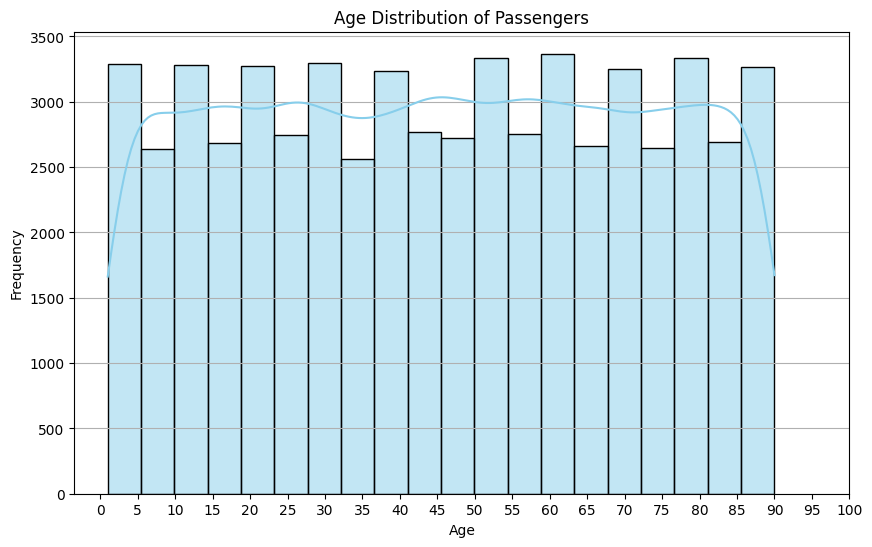

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#A histogram provides a view of the age distribution among passengers.

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='skyblue', kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y')
plt.show()


**Bivariate Analysis**

Scatter Plot of Age vs. Flight Status

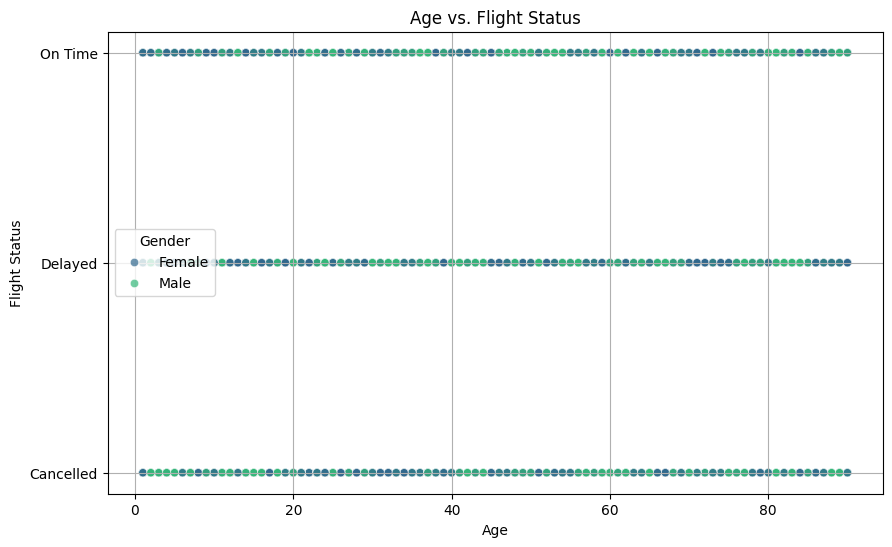

In [16]:
#This scatter plot shows the relationship between passengers' ages and their flight status.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='flight_status', hue='gender', palette='viridis', alpha=0.7)
plt.title('Age vs. Flight Status')
plt.xlabel('Age')
plt.ylabel('Flight Status')
plt.legend(title='Gender')
plt.grid()
plt.show()


**Time Series Analysis**

Flights Over Time


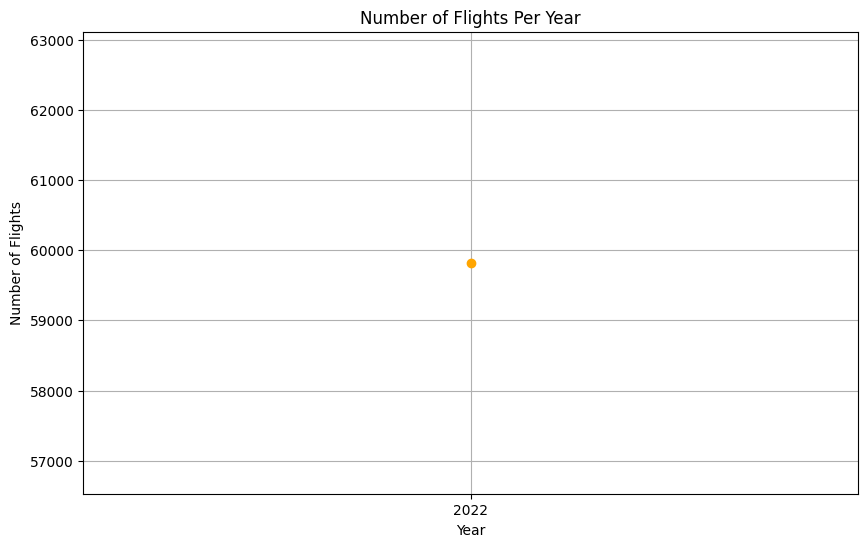

In [17]:
#Here, we analyze how the number of flights changes over time, which can help identify trends.

# Convert 'Departure Date' to datetime and extract year for analysis
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['year'] = df['departure_date'].dt.year

# Count flights per year
flights_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
flights_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Number of Flights Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.xticks(flights_per_year.index)
plt.grid()
plt.show()


**Impact of Removing Outliers**

Age Distribution Before and After Removing Outliers

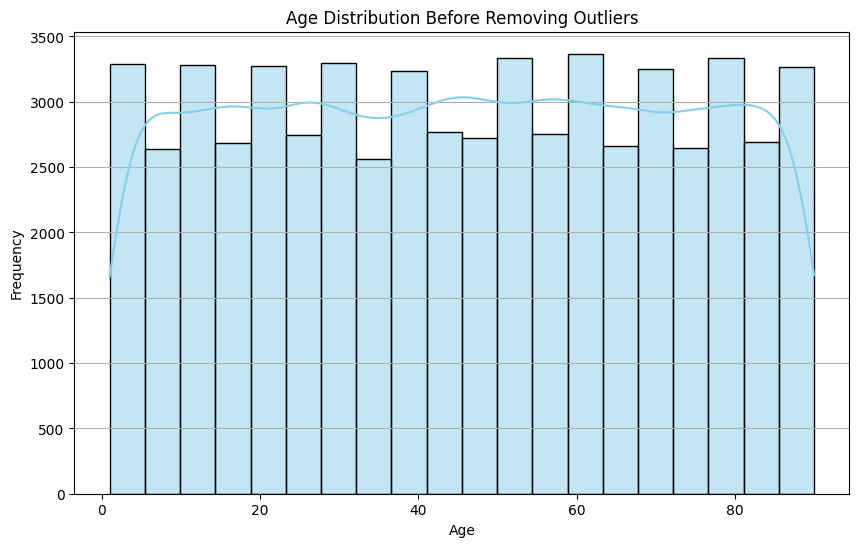

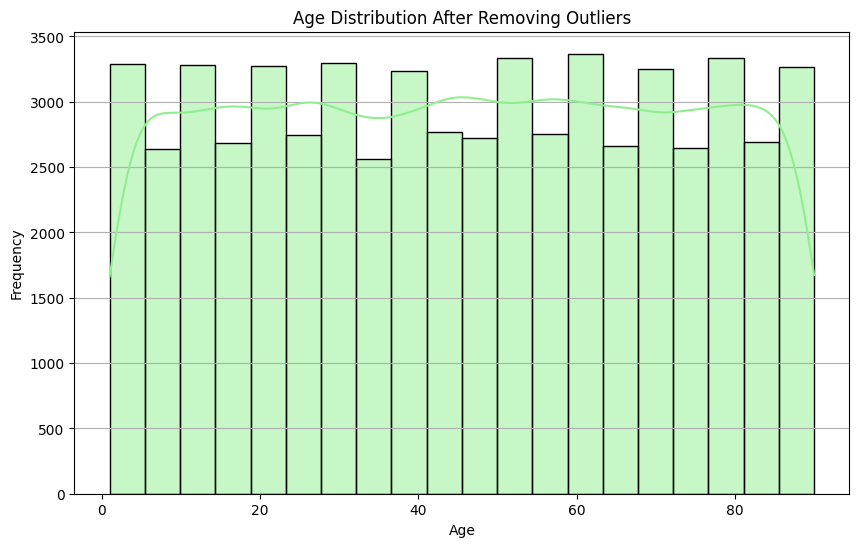

In [18]:
#This section compares the age distribution before and after removing outliers to visualize the effect.

# Detect outliers in the 'Age' column using IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Data before removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='skyblue', kde=True)
plt.title('Age Distribution Before Removing Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Remove outliers
df_cleaned = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Data after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], bins=20, color='lightgreen', kde=True)
plt.title('Age Distribution After Removing Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


Descriptive Statistics for Numeric Columns

We will use the describe() function to explore basic statistics such as count, mean, standard deviation, min, max, and quartiles for numeric columns.

In [25]:
# Descriptive statistics for numeric columns
df['age'].describe()


,age
count,59821.000000
mean,45.567944
std,25.921867
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


 Descriptive Statistics for Categorical Columns (e.g., Flight Status)

For categorical columns like Flight Status (which might represent flight delays, cancellations, etc.), we’ll use the value_counts() function to see the distribution of values.

In [26]:
# Descriptive statistics for a categorical column (e.g., Flight Status)
df['flight_status'].value_counts()


,count
flight_status,
Cancelled,20009
Delayed,19968
On Time,19844


Descriptive Statistics for Date Column (e.g., Departure Date)

For date columns, we’ll extract useful statistics such as the earliest and latest departure dates.

In [21]:
# Convert 'Departure Date' to datetime format
df['departure_date'] = pd.to_datetime(df['departure_date'])

# Get the earliest and latest departure date
earliest_departure = df['departure_date'].min()
latest_departure = df['departure_date'].max()

earliest_departure, latest_departure


(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-30 00:00:00'))

 Calculating Median, Mode, and Custom Statistics for Multiple Columns

In addition to using describe(), we can calculate specific statistics such as median and mode for selected columns.

In [22]:
# Calculate the median and mode for 'Age'
age_median = df['age'].median()
age_mode = df['age'].mode()

# Display median and mode
age_median, age_mode[0]


(46.0, 75.0)

In [23]:
pip install plotly pandas


**Interactive Univariate Analysis - Age Distribution**

In [27]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Interactive histogram for Age distribution
fig = px.histogram(df, x='age', nbins=20, title='Age Distribution of Passengers')
fig.update_layout(xaxis_title='age', yaxis_title='Count', template='plotly_dark')
fig.show()


**Interactive Bivariate Analysis - Age vs Flight Status**


In [31]:
# Interactive scatter plot for Age vs Flight Status
fig = px.scatter(df, x='age', y='flight_status', color='flight_status', title='Age vs Flight Status',
                 labels={'Age':'Passenger Age', 'Flight Status':'Flight Status'})
fig.update_layout(template='plotly_dark')
fig.show()


**Interactive Time Series Analysis - Flight Departure Over Time**

In [32]:
# Convert 'Departure Date' to datetime if it's not already in that format
df['departure_date'] = pd.to_datetime(df['departure_date'])

# Group by date and count the number of flights
flight_count = df.groupby('departure_date').size().reset_index(name='Flight Count')

# Interactive line chart for flight departures over time
fig = px.line(flight_count, x='departure_date', y='Flight Count', title='Flight Departures Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Number of Flights', template='plotly_dark')
fig.show()


In [33]:
pip install requests


Error fetching weather data: Status code 401
Error fetching weather data: Status code 401
Error fetching weather data: Status code 401


<ipython-input-41-8c45043455ff>:55: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



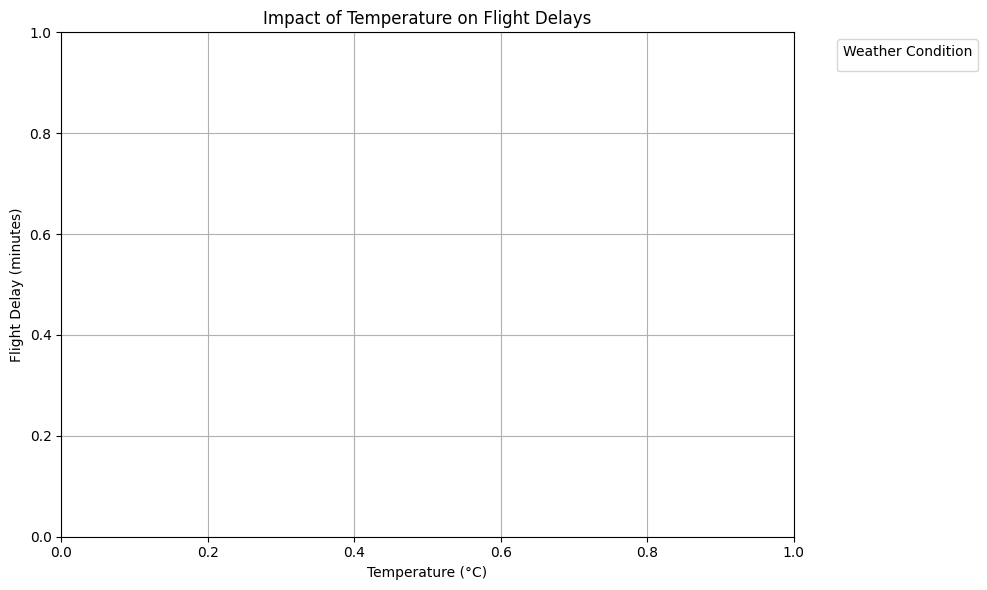

In [41]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame df for demonstration
data = {
    'airport_continent': ['New York', 'London', 'Tokyo'],
    'departure_date': ['2024-10-15', '2024-10-16', '2024-10-17']
}
df = pd.DataFrame(data)

# Function to fetch weather data
def get_weather_data(location):
    api_key = 'ce698468cc27df8cb5ac283241bf9f0c'  # Replace with your actual API key
    # Correct base URL for OpenWeatherMap API
    base_url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric"  # Using metric for Celsius

    response = requests.get(base_url)
    if response.status_code == 200:
        weather_data = response.json()
        # Extract relevant weather information
        return {
            'temperature': weather_data['main']['temp'],
            'humidity': weather_data['main']['humidity'],
            'weather': weather_data['weather'][0]['description'],
        }
    else:
        print(f"Error fetching weather data: Status code {response.status_code}")  # Print error for debugging
        return None

# Fetch weather data for each departure location and date
weather_records = []
for index, row in df.iterrows():
    weather_data = get_weather_data(row['airport_continent'])
    if weather_data:
        weather_records.append(weather_data)
    else:
        weather_records.append({'temperature': None, 'humidity': None, 'weather': None})

# Create a DataFrame from the weather records
weather_df = pd.DataFrame(weather_records)

# Merge weather data with the airline dataset
df_combined = pd.concat([df.reset_index(drop=True), weather_df], axis=1)

# Analyze the relationship between temperature and flight delays
# For example: Let's check how average temperature correlates with delays
df_combined['Flight Delay'] = [15, 30, 5]  # Sample data for demonstration

# Visualize the data
plt.figure(figsize=(10, 6))

# Ensure 'weather' is valid for hue
sns.scatterplot(data=df_combined.dropna(subset=['temperature', 'Flight Delay']),
                 x='temperature', y='Flight Delay', hue='weather',
                 palette='viridis', edgecolor='w')

plt.title('Impact of Temperature on Flight Delays')
plt.xlabel('Temperature (°C)')
plt.ylabel('Flight Delay (minutes)')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()  # To fit the legend better
plt.show()
